In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import joblib
from sklearn.decomposition import TruncatedSVD

# Function to convert sequences to numeric representation
def sequence_to_numeric(sequence):
    return [CHAR_TO_INT[char] for char in sequence]

# Function to convert numeric representation back to sequence
def numeric_to_sequence(numeric_seq):
    return "".join([INT_TO_CHAR[num] for num in numeric_seq])

def remove_duplicate(word_list):
    unique_words = set()
    result = []

    for word in word_list:
        if word not in unique_words:
            unique_words.add(word)
            result.append(word)

    return result

def get_sequences(file_name):
    sequences = []
    lines = []
    with open(file_name, "r") as input_file:
        lines = list(filter(None, input_file.read().split("\n")))

    parts = []
    for line in lines:
        if line.startswith(">"):
            if parts:
                sequences.append("".join(parts))
            parts = []
        else:
            parts.append(line)
    if parts:
        sequences.append("".join(parts))
    return sequences

def row_average_features(kmers, CHAR_TO_INT):
    features = []
    for kmer in kmers:
        numeric_kmer = [CHAR_TO_INT[char] for char in kmer]
        avg = np.mean(numeric_kmer)
        features.append(avg)
    return features

def process_data(sequences):
    input_output_pairs = []
    for seq in sequences:
        for start in range(len(seq)-11):
            end = start + 11
            seq_in = seq[start:end]
            temp = seq_in[0:10]+ "-"
            seq_out = seq_in[10]
            input_output_pairs.append((temp, seq_out))
            temp = "-" + seq_in[1:11]
            seq_out = seq_in[0]
            input_output_pairs.append((temp, seq_out))
    return input_output_pairs

print("loading data")
# Load training sequences
training_sequences = list(set(get_sequences("data/new/p5A_training_sequence.txt")))
sequences_to_train_on = len(training_sequences)

all_chars = set("".join(training_sequences) + "-")
NUM_CLASSES = len(all_chars)
CHAR_TO_INT = {c: i for i, c in enumerate(all_chars, start=1)}
INT_TO_CHAR = {v: k for k, v in CHAR_TO_INT.items()}


X_train_data = []
y_train_data = []
training_seq_dict= process_data(training_sequences)
for keys in training_seq_dict:
    X_train_data = X_train_data + [sequence_to_numeric(keys[0])]
    y_train_data = y_train_data + [keys[1]]


loading data


In [2]:
def KNN_model(X_train, y_train):  
    # Train the KNN classifier
    k = 5
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Use tqdm to visualize training progress
    with tqdm(total=len(X_train), desc="TrainingSequences") as pbar:
        knn_classifier.fit(np.array(X_train), y_train)
        pbar.update(len(X_train))

    # Save the KNN model
    joblib.dump(knn_classifier, 'knn_model_old.pkl')
    
    return knn_classifier
    
def KNN_SVD_model(X_train_svd, y_train):

    k = 5
    # Train the KNN classifier on the reduced data
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_svd, y_train)

    joblib.dump(knn_classifier, 'knn_svd_model.pkl')
    return knn_classifier
    
def KNN_row_model(X_train, y_train):

    # Train the KNN classifier
    k = 5
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Use tqdm to visualize training progress
    with tqdm(total=len(X_train), desc="TrainingSequences") as pbar:
        knn_classifier.fit(X_train, y_train)
        pbar.update(len(X_train))

    # Save the KNN model
    joblib.dump(knn_classifier, 'knn_row_model.pkl')
    return knn_classifier

    
def DT_model(X_train, y_train):
    dt_classifier = DecisionTreeClassifier()
    # Use tqdm to visualize training progress
    with tqdm(total=len(X_train), desc="Training Sequences") as pbar:
        dt_classifier.fit(np.array(X_train), y_train)
        pbar.update(len(X_train))


    joblib.dump(dt_classifier, 'dt_model.pkl')
    return dt_classifier

def DT_SVD_model(X_train_svd, y_train):

    dt_classifier = DecisionTreeClassifier()
    with tqdm(total=len(X_train_svd), desc="TrainingSequences") as pbar:
        dt_classifier.fit(X_train_svd, y_train)
        pbar.update(len(X_train_svd))
    joblib.dump(dt_classifier, 'dt_svd_model.pkl')
    return dt_classifier
    
def DT_row_model(X_train, y_train):

    dt_classifier = DecisionTreeClassifier()
    # Use tqdm to visualize training progress
    with tqdm(total=len(X_train), desc="TrainingSequences") as pbar:
        dt_classifier.fit(X_train, y_train)
        pbar.update(len(X_train))

    # Save the KNN model
    joblib.dump(dt_classifier, 'dt_row_model.pkl')
    return dt_classifier

def rf_model(X_train, y_train):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # Fit the model to the training data
    with tqdm(total=len(X_train), desc="TrainingSequences") as pbar:
        rf_classifier.fit(X_train, y_train)
        pbar.update(len(X_train))
    joblib.dump(rf_classifier, 'rf_model.pkl')
    return rf_classifier
    
def rf_SVD_model(X_train_svd, y_train):

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # Fit the model to the training data
    with tqdm(total=len(X_train_svd), desc="TrainingSequences") as pbar:
        rf_classifier.fit(X_train_svd, y_train)
        pbar.update(len(X_train_svd))
    joblib.dump(rf_classifier, 'rf_svd_model.pkl')
    return rf_classifier
    
def rfo_row_model(X_train, y_train):

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # Fit the model to the training data
    with tqdm(total=len(X_train), desc="TrainingSequences") as pbar:
        rf_classifier.fit(X_train, y_train)
        pbar.update(len(X_train))
    joblib.dump(rf_classifier, 'rf_row_model.pkl')
    return rf_classifier


In [5]:
with open("CHAR_TO_INT.txt", "w") as input_file:
    input_file.write(str(CHAR_TO_INT))
                         
with open("INT_TO_CHAR.txt", "w") as input_file:
    input_file.write(str(INT_TO_CHAR))

In [3]:
X= X_train_data
y= y_train_data
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [5]:
#data split
max_seq_length = max(len(seq) for seq in X_train_data)

# Pad training sequences to the same length
padded_training_sequences_numeric = [seq + [0] * (max_seq_length - len(seq)) for seq in X_train_data]

X_train = np.array(padded_training_sequences_numeric)
y_train = np.array(y_train_data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

knn_model = KNN_model(X_train,y_train)

predicted_labels = knn_model.predict(X_train)
accuracy_train = accuracy_score(y_train, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = knn_model.predict(X_val)
accuracy =  accuracy_score(y_val, y_pred)
print("Val Accuracy :",accuracy)

dt_model = DT_model(X_train,y_train)

predicted_labels = dt_model.predict(X_train)
accuracy_train = accuracy_score(y_train, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = dt_model.predict(X_val)
accuracy =  accuracy_score(y_val, y_pred)
print("Val Accuracy :",accuracy)


rf_model = rf_model(X_train,y_train)
predicted_labels = rf_model.predict(X_train)
accuracy_train = accuracy_score(y_train, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = rf_model.predict(X_val)
accuracy =  accuracy_score(y_val, y_pred)
print("Val Accuracy :",accuracy)

#SVD 
# Perform Singular Value Decomposition (SVD) on your data
n_components = 11
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_val_svd = svd.transform(X_val)

knn_svd_model = KNN_SVD_model(X_train_svd,y_train)

predicted_labels = knn_svd_model.predict(X_train_svd)
accuracy_train = accuracy_score(y_train, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = knn_svd_model.predict(X_val_svd)
accuracy =  accuracy_score(y_val, y_pred)
print("Val Accuracy :",accuracy)

dt_svd_model = DT_SVD_model(X_train_svd,y_train)

predicted_labels = dt_svd_model.predict(X_train_svd)
accuracy_train = accuracy_score(y_train, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = dt_svd_model.predict(X_val_svd)
accuracy =  accuracy_score(y_val, y_pred)
print("Val Accuracy :",accuracy)

rf_svd_model = rf_SVD_model(X_train_svd,y_train)

predicted_labels = rf_svd_model.predict(X_train_svd)
accuracy_train = accuracy_score(y_train, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = rf_svd_model.predict(X_val_svd)
accuracy =  accuracy_score(y_val, y_pred)
print("Val Accuracy :",accuracy)


#Row Average data split

for keys in training_seq_dict:
    X_train_data = X_train_data + [row_average_features(keys[0], CHAR_TO_INT)]
    y_train_data = y_train_data + [keys[1]]
X_train_row = np.array(X_train_data)
y_train_row = np.array(y_train_data)
X_train_row, X_val_row, y_train_row, y_val_row = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#print mistake in prediction for dT and RF below
# knn_row_model = KNN_row_model(X_train_row,y_train_row)

# predicted_labels = knn_row_model.predict(X_train_row)
# accuracy_train = accuracy_score(y_train_row, predicted_labels)
# print("training Accuracy :", accuracy_train)
# y_pred = knn_row_model.predict(X_val_row)
# accuracy =  accuracy_score(y_val_row, y_pred)
# print("Val Accuracy :",accuracy)

# dt_row_model = DT_row_model(X_train_row,y_train_row)

# predicted_labels = knn_row_model.predict(X_train_row)
# accuracy_train = accuracy_score(y_train_row, predicted_labels)
# print("training Accuracy :", accuracy_train)
# y_pred = knn_row_model.predict(X_val_row)
# accuracy =  accuracy_score(y_val_row, y_pred)
# print("Val Accuracy :",accuracy)

# rf_row_model = rf_row_model(X_train_row,y_train_row)

# predicted_labels = knn_row_model.predict(X_train_row)
# accuracy_train = accuracy_score(y_train_row, predicted_labels)
# print("training Accuracy :", accuracy_train)
# y_pred = knn_row_model.predict(X_val_row)
# accuracy =  accuracy_score(y_val_row, y_pred)
# print("Val Accuracy :",accuracy)

TrainingSequences: 100%|████████████| 378995/378995 [00:01<00:00, 347768.95it/s]


training Accuracy : 0.9335927914616288
Val Accuracy : 0.9140842060269289


Training Sequences: 100%|███████████| 378995/378995 [00:01<00:00, 284488.82it/s]


training Accuracy : 0.9662845156268552
Val Accuracy : 0.9288072000189974


TrainingSequences: 100%|██████████████| 378995/378995 [00:39<00:00, 9602.27it/s]


training Accuracy : 0.9662845156268552
Val Accuracy : 0.9426990572534493
training Accuracy : 0.9317035844800063
Val Accuracy : 0.9125169195697086


TrainingSequences: 100%|█████████████| 378995/378995 [00:03<00:00, 97452.81it/s]


training Accuracy : 0.9662845156268552
Val Accuracy : 0.909714801358315


TrainingSequences: 100%|██████████████| 378995/378995 [01:28<00:00, 4300.37it/s]


training Accuracy : 0.9662845156268552
Val Accuracy : 0.9274298876778039


TrainingSequences: 100%|████████████| 341095/341095 [00:00<00:00, 498689.58it/s]


training Accuracy : 0.9310250809891673
Val Accuracy : 0.9118733509234829


TrainingSequences: 100%|████████████| 341095/341095 [00:00<00:00, 343117.81it/s]


training Accuracy : 0.9310250809891673
Val Accuracy : 0.9118733509234829


NameError: name 'rf_row_model' is not defined

In [8]:
#Corrected code for row model
X_train_row = np.array(X_train_data)
y_train_row = np.array(y_train_data)
X_train_row, X_val_row, y_train_row, y_val_row = train_test_split(X_train_row, y_train_row, test_size=0.1, random_state=42)

knn_row_model = KNN_row_model(X_train_row,y_train_row)

predicted_labels = knn_row_model.predict(X_train_row)
accuracy_train = accuracy_score(y_train_row, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = knn_row_model.predict(X_val_row)
accuracy =  accuracy_score(y_val_row, y_pred)
print("Val Accuracy :",accuracy)

dt_row_model = DT_row_model(X_train_row,y_train_row)

predicted_labels = dt_row_model.predict(X_train_row)
accuracy_train = accuracy_score(y_train_row, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = dt_row_model.predict(X_val_row)
accuracy =  accuracy_score(y_val_row, y_pred)
print("Val Accuracy :",accuracy)

r_row_model = rfo_row_model(X_train_row,y_train_row)

predicted_labels = r_row_model.predict(X_train_row)
accuracy_train = accuracy_score(y_train_row, predicted_labels)
print("training Accuracy :", accuracy_train)
y_pred = r_row_model.predict(X_val_row)
accuracy =  accuracy_score(y_val_row, y_pred)
print("Val Accuracy :",accuracy)

TrainingSequences: 100%|████████████| 757990/757990 [00:01<00:00, 409983.09it/s]


training Accuracy : 0.9435361944088972
Val Accuracy : 0.9293415022203225


TrainingSequences: 100%|████████████| 757990/757990 [00:03<00:00, 244700.71it/s]


training Accuracy : 0.9663016662488951
Val Accuracy : 0.9595236399040631


TrainingSequences: 100%|██████████████| 757990/757990 [01:19<00:00, 9518.77it/s]


training Accuracy : 0.9662990276916582
Val Accuracy : 0.9608059651872433


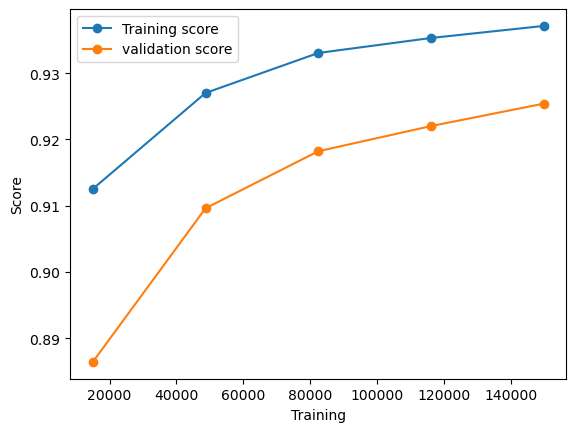

In [28]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="validation score")

plt.xlabel("Training")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    knn_svd_model, X_val_svd, y_val_svd, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="validation score")

plt.xlabel("Training")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    knn_row_model, X_val_row, y_val_row, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="validation score")

plt.xlabel("Training")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [49]:
print(len(X))

416272


In [57]:
#data split
max_seq_length = max(len(seq) for seq in X)

# Pad training sequences to the same length
padded_training_sequences_numeric = [seq + [0] * (max_seq_length - len(seq)) for seq in X]

X_train = np.array(padded_training_sequences_numeric)
y_train = np.array(y)
n_components = 11
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X)
X_train_row = np.array(X_train_data)
y_train_row = np.array(y_train_data)

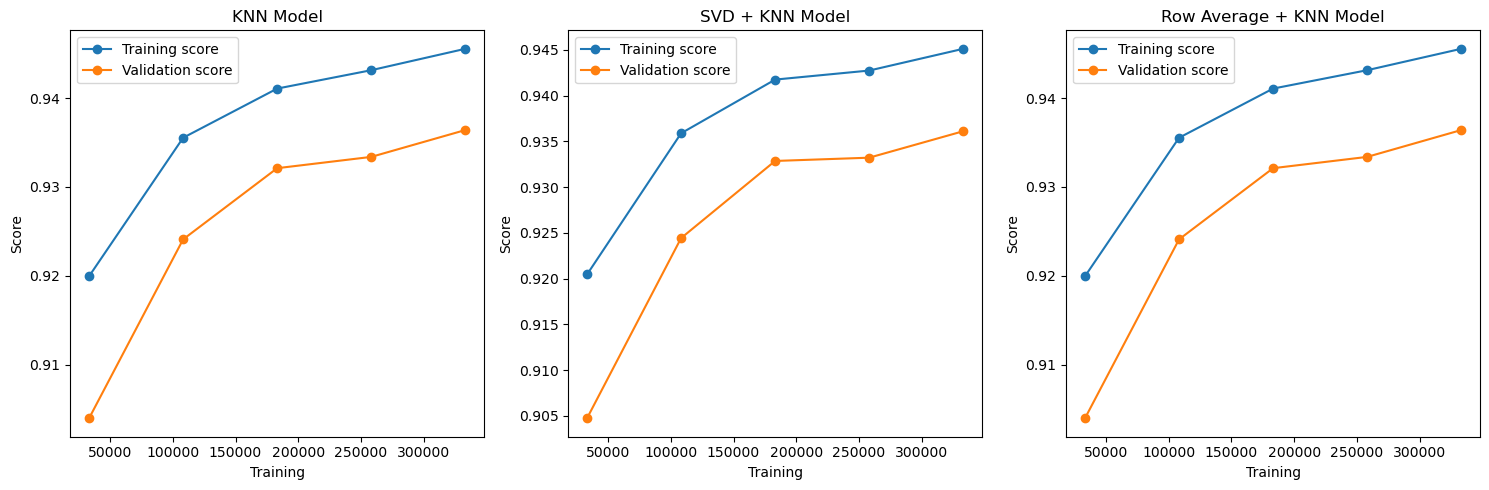

In [51]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a ScalarFormatter object for scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))

# First Model - KNN Model
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[0].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[0].set_title('KNN Model')
axes[0].set_xlabel('Training')
axes[0].set_ylabel('Score')

axes[0].legend(loc="best")

# Second Model - KNN SVD Model
train_sizes, train_scores, test_scores = learning_curve(
    knn_svd_model, X_train_svd, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[1].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[1].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[1].set_title('SVD + KNN Model')
axes[1].set_xlabel('Training')
axes[1].set_ylabel('Score')
axes[1].legend(loc="best")

# Third Model - KNN Row Model
train_sizes, train_scores, test_scores = learning_curve(
    knn_row_model, X_train_row, y_train_row, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[2].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[2].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[2].set_title('Row Average + KNN Model')
axes[2].set_xlabel('Training')
axes[2].set_ylabel('Score')
axes[2].legend(loc="best")

plt.tight_layout()
plt.show()


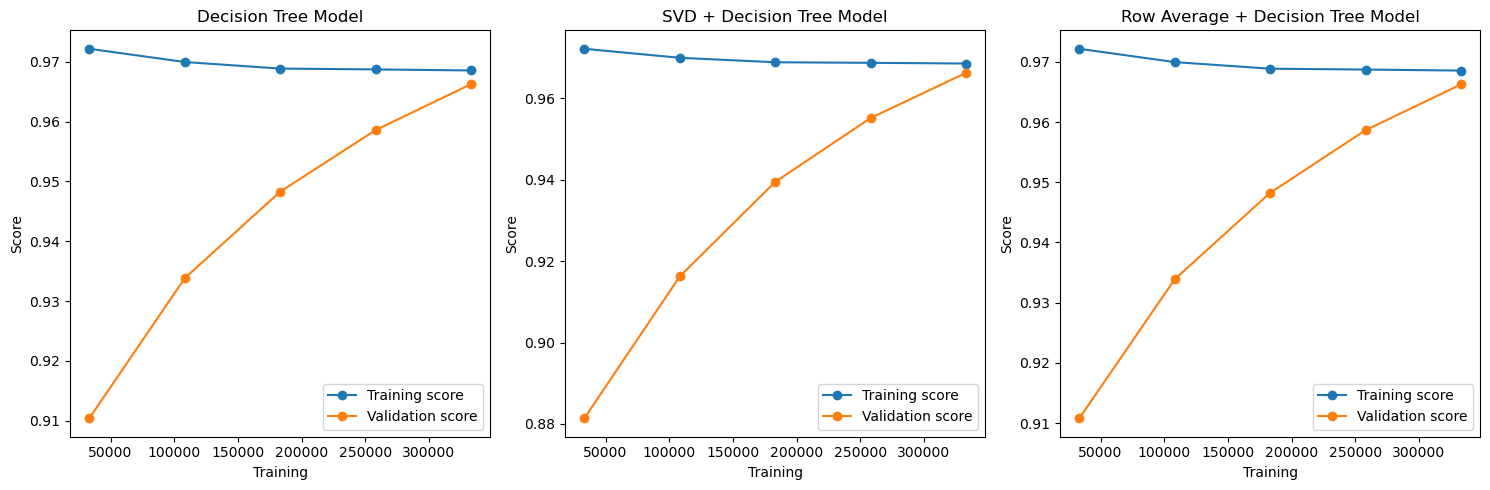

In [53]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a ScalarFormatter object for scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))

# First Model - KNN Model
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[0].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[0].set_title('Decision Tree Model')
axes[0].set_xlabel('Training')
axes[0].set_ylabel('Score')

axes[0].legend(loc="best")

# Second Model - KNN SVD Model
train_sizes, train_scores, test_scores = learning_curve(
    dt_svd_model, X_train_svd, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[1].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[1].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[1].set_title('SVD + Decision Tree Model')
axes[1].set_xlabel('Training')
axes[1].set_ylabel('Score')
axes[1].legend(loc="best")

# Third Model - KNN Row Model
train_sizes, train_scores, test_scores = learning_curve(
    dt_row_model, X_train_row, y_train_row, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[2].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[2].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[2].set_title('Row Average + Decision Tree Model')
axes[2].set_xlabel('Training')
axes[2].set_ylabel('Score')
axes[2].legend(loc="best")

plt.tight_layout()
plt.show()


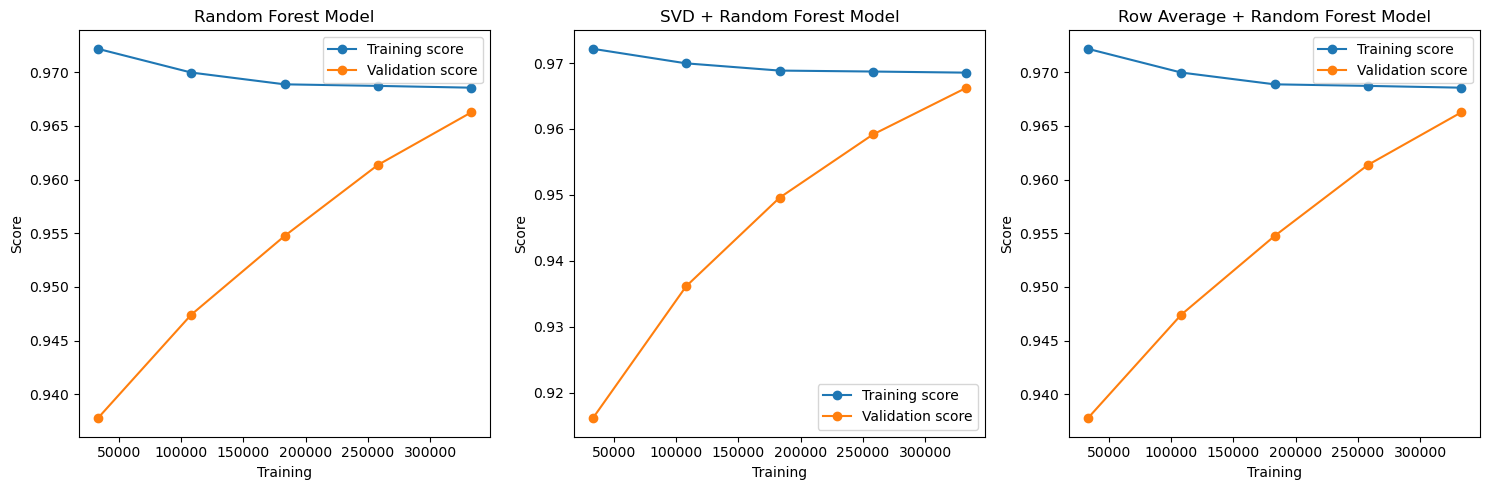

In [59]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a ScalarFormatter object for scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))

# First Model - KNN Model
train_sizes, train_scores, test_scores = learning_curve(
    r_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[0].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[0].set_title('Random Forest Model')
axes[0].set_xlabel('Training')
axes[0].set_ylabel('Score')

axes[0].legend(loc="best")

# Second Model - KNN SVD Model
train_sizes, train_scores, test_scores = learning_curve(
    rf_svd_model, X_train_svd, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[1].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[1].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[1].set_title('SVD + Random Forest Model')
axes[1].set_xlabel('Training')
axes[1].set_ylabel('Score')
axes[1].legend(loc="best")

# Third Model - KNN Row Model
train_sizes, train_scores, test_scores = learning_curve(
    r_row_model, X_train_row, y_train_row, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axes[2].plot(train_sizes, train_scores_mean, 'o-', label="Training score")
axes[2].plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
axes[2].set_title('Row Average + Random Forest Model')
axes[2].set_xlabel('Training')
axes[2].set_ylabel('Score')
axes[2].legend(loc="best")

plt.tight_layout()
plt.show()


In [14]:
de_novo_sequence = "-IVLT---G--S--PG-RATLSCR-S-SV-S-Y-AWYQQK-G-APRLLI-DA-TRATG-P-R-SG-G--AD\
FLLTI-SLEPEDF-M-YCQQYGRSPYTFGPGTKVDIKRTVAAPS---FPPSDEQLKS-TA-VVCL-NNFY-\
REA-VQW-V-NA-QSGNS---VTEQDS--STY-LSS-L-LS-ADYE-H--YAC-VT-Q\
GLS-PVTKSFN----"
new_seq = []
for count,  i in enumerate(range(len(de_novo_sequence) - 11 + 1)):
    kmer = de_novo_sequence[i:i + 11]
    new_seq = new_seq + [kmer]

while "-" in de_novo_sequence:
    keys_with_dash = [key for key in new_seq if key.count('-') == 1]
    if len(keys_with_dash) == 0:
        keys_with_dash = [key for key in new_seq if key.count('--') == 2]
    for k in keys_with_dash:
        if k[0] == "-" or k[10] == "-":
            if k in de_novo_sequence:
                
                # Convert de novo sequence and its reverse to numeric representation
                de_novo_sequence_numeric = sequence_to_numeric(k)

                X_de_novo = np.array([de_novo_sequence_numeric])
                # Make predictions for the de novo sequence reverse
                y_pred_de_novo = r_row_model.predict(X_de_novo)
                # Convert the predicted labels back to sequences for verification
                predicted_value = y_pred_de_novo[0]
                index = de_novo_sequence.index(k)
                index1 = k.index("-")
                if 0 <= (index + index1) < len(de_novo_sequence):
                    de_novo_sequence = de_novo_sequence[:(index + index1)] + predicted_value +de_novo_sequence[(index + index1) + 1:]

            # Update new_seq after filling a gap
                new_seq.clear()
                for count, i in enumerate(range(len(de_novo_sequence) - 11 + 1)):
                    kmer = de_novo_sequence[i:i + 11]
                    new_seq = new_seq + [kmer]
                keys_with_dash = [key for key in new_seq if key.count('-') == 1]
                if len(keys_with_dash) == 0:
                    keys_with_dash = [key for key in new_seq if key.count('--') == 2]
        
# Print the predicted sequence for the de novo sequence
print("Predicted Sequence for De Novo:", de_novo_sequence)

Predicted Sequence for De Novo: EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRFSGSGSGADFLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
